In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from data.utils import load_training_datasets
import os

# %env MLFLOW_TRACKING_URI /scratch/ag7531/mlruns

In [2]:
import xarray as xr
import numpy as np
import math

In [3]:
data_test=False #test with small batch, big batch needs .py to run

In [4]:
param_hires = xr.open_mfdataset('/scratch/gpfs/cz3321/CM2P6/GFDL_CM2_6_grid.nc')

In [5]:
param_hires

<xarray.Dataset>
Dimensions:         (yt_ocean: 2700, xt_ocean: 3600, yu_ocean: 2700,
                     xu_ocean: 3600, st_edges_ocean: 51, st_ocean: 50,
                     sw_edges_ocean: 51, sw_ocean: 50)
Coordinates:
  * st_edges_ocean  (st_edges_ocean) float64 0.0 10.07 ... 5.29e+03 5.5e+03
  * st_ocean        (st_ocean) float64 5.034 15.1 25.22 ... 5.185e+03 5.395e+03
  * sw_edges_ocean  (sw_edges_ocean) float64 5.034 15.1 ... 5.395e+03 5.5e+03
  * sw_ocean        (sw_ocean) float64 10.07 20.16 30.29 ... 5.29e+03 5.5e+03
  * xt_ocean        (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.85 79.95
  * xu_ocean        (xu_ocean) float64 -279.9 -279.8 -279.7 ... 79.8 79.9 80.0
  * yt_ocean        (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.94 89.98
  * yu_ocean        (yu_ocean) float64 -81.09 -81.05 -81.0 ... 89.92 89.96 90.0
Data variables: (12/19)
    area_t          (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    area_u          (yu_ocean, xu_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dxt             (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dxu             (yu_ocean, xu_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyt             (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyu             (yu_ocean, xu_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    ...              ...
    geolon_t        (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    ht              (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    hu              (yu_ocean, xu_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    kmt             (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    kmu             (yu_ocean, xu_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    wet             (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>

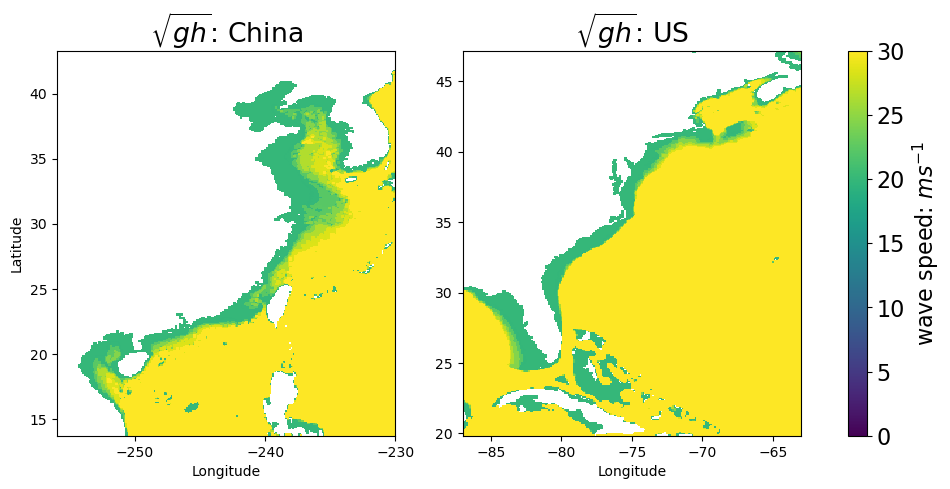

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
plt.rcParams.update({'font.size': 16})
xq = param_hires['xu_ocean']
yq = param_hires['yu_ocean']
depth=param_hires['ht']
depth=np.where(depth == 0, np.nan, depth)
depth=np.sqrt(depth*9.81)
p = ax[0].pcolormesh(xq,yq,depth,vmin=0, vmax = 30)
ax[0].axis('equal')
ax[0].set_xlim(-256,-230)
ax[0].set_ylim(15,42)
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('$\sqrt{gh}$: China')
p = ax[1].pcolormesh(xq,yq,depth,vmin=0, vmax = 30)
ax[1].axis('equal')
ax[1].set_xlim(-87,-63)
ax[1].set_ylim(22,45)
ax[1].set_xlabel('Longitude')
ax[1].set_title('$\sqrt{gh}$: US')
fig.colorbar(p, ax=ax, label='wave speed: $ms^{-1}$')

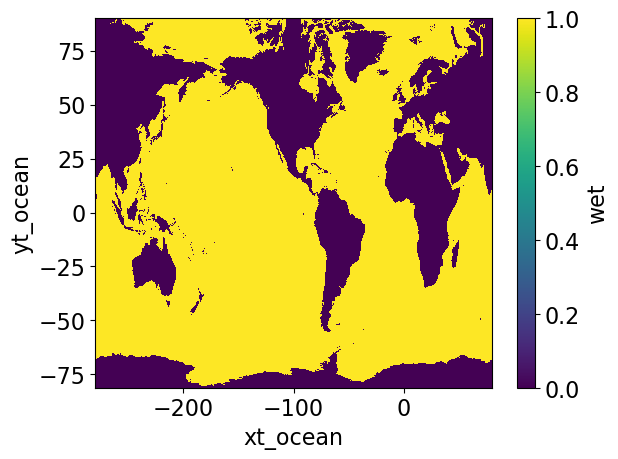

In [7]:
param_hires['wet'].plot()
plt.show()

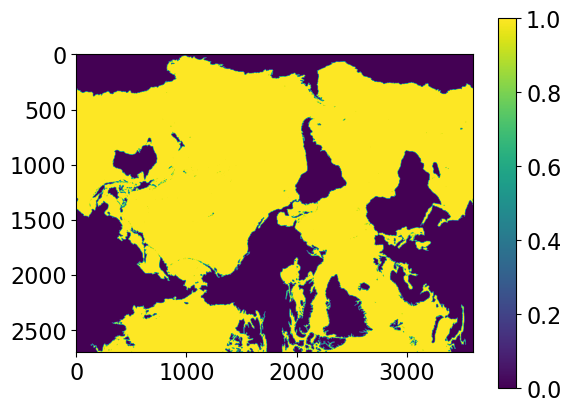

In [8]:
import torch
maskn=param_hires['wet']
maskn_np = maskn.values
maskn_tensor1 = torch.from_numpy(maskn_np).float()
plt.imshow(maskn_tensor1)
plt.colorbar() 

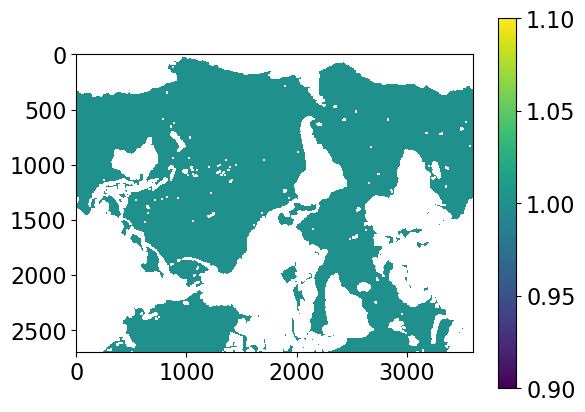

In [9]:
maskn=param_hires['wet']
maskn_np = maskn.values
maskn_tensor = torch.from_numpy(maskn_np).float()
maskn_tensor  = torch.where(maskn_tensor  == 0, torch.tensor(float('nan')), maskn_tensor )
plt.imshow(maskn_tensor)
plt.colorbar() 

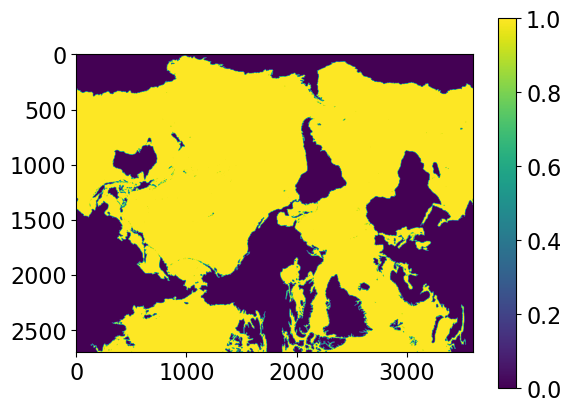

In [10]:
maskn=param_hires['wet']
maskn_np = maskn.values
maskn_tensor = torch.from_numpy(maskn_np).float()
maskn_tensor  = torch.where(maskn_tensor  == 0, torch.tensor(float('nan')), maskn_tensor )
mask_halo0=maskn_tensor.clone()
mask_halo0[mask_halo0 != mask_halo0] = 0
plt.imshow(mask_halo0)
plt.colorbar() 

In [11]:
torch.equal(maskn_tensor1,mask_halo0)

True

In [12]:
if data_test==True:
  raw_data = xr.open_zarr('/scratch/cimes/cz3321/MOM6/experiments/double_gyre/postprocess/offline_test/cm2p6/forcing.zarr')
  # raw_data = xr.open_zarr('/scratch/gpfs/cz3321/CM2P6/forcing.zarr') 
  raw_datasets = load_training_datasets(raw_data, 'training_subdomains.yaml')
else:
  # raw_data = xr.open_zarr('/scratch/cimes/cz3321/MOM6/experiments/double_gyre/postprocess/offline_test/cm2p6/forcing.zarr')
  raw_data = xr.open_zarr('/scratch/gpfs/cz3321/CM2P6/forcing.zarr')
  raw_datasets = load_training_datasets(raw_data, 'training_subdomains.yaml')

In [13]:
raw_datasets

[<xarray.Dataset>
 Dimensions:   (time: 7305, yu_ocean: 645, xu_ocean: 900)
 Coordinates:
   * time      (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
   * xu_ocean  (xu_ocean) float64 -279.7 -279.3 -278.9 ... 79.05 79.45 79.85
   * yu_ocean  (yu_ocean) float64 -81.02 -80.86 -80.69 ... 84.53 84.7 84.87
 Data variables:
     S_x       (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 645, 900), meta=np.ndarray>
     S_y       (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 645, 900), meta=np.ndarray>
     usurf     (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 645, 900), meta=np.ndarray>
     vsurf     (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 645, 900), meta=np.ndarray>
 Attributes:
     filename:   01810101.ocean_minibling_surf_field.nc
     grid_tile:  1
     grid_type:  mosaic
     history:    2014-01-15 17:01:45 -0500: /home/Richard.Slater/ruby/remove_d...
     title:      CM2.6_miniBling]

In [14]:
if data_test==False:
  first_dataset = raw_datasets[0]

  # #pick randomly
  # np.random.seed(42)
  # random_indices = np.random.choice(first_dataset.time.size, 1000, replace=False)

  #pick test dataset (20% in the end)
  start_index = int(first_dataset.time.size*0.8)
  random_indices = slice(start_index, None)

  random_snapshots = first_dataset.isel(time=random_indices)

In [15]:
random_snapshots

<xarray.Dataset>
Dimensions:   (time: 1461, yu_ocean: 645, xu_ocean: 900)
Coordinates:
  * time      (time) object 0197-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xu_ocean  (xu_ocean) float64 -279.7 -279.3 -278.9 ... 79.05 79.45 79.85
  * yu_ocean  (yu_ocean) float64 -81.02 -80.86 -80.69 ... 84.53 84.7 84.87
Data variables:
    S_x       (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 645, 900), meta=np.ndarray>
    S_y       (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 645, 900), meta=np.ndarray>
    usurf     (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 645, 900), meta=np.ndarray>
    vsurf     (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 645, 900), meta=np.ndarray>
Attributes:
    filename:   01810101.ocean_minibling_surf_field.nc
    grid_tile:  1
    grid_type:  mosaic
    history:    2014-01-15 17:01:45 -0500: /home/Richard.Slater/ruby/remove_d...
    title:      CM2.6_miniBling

In [16]:
if data_test==False:
  low_rez = random_snapshots
else:
  low_rez = raw_datasets[0]
u = low_rez['usurf']
v = low_rez['vsurf']
# u = prog['u'].fillna(0)

In [17]:
low_rez.nbytes / 1e9

13.569792048

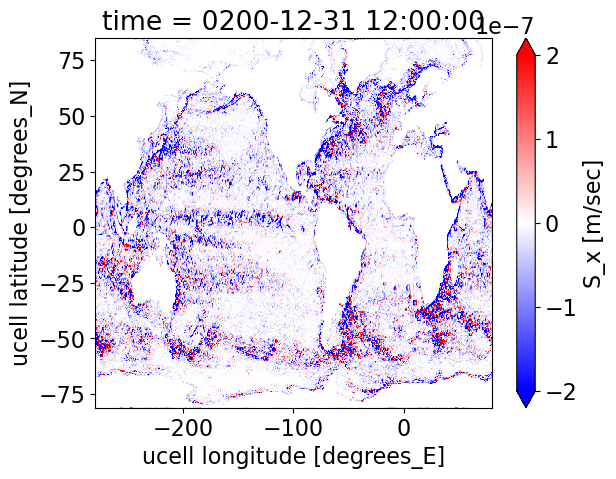

In [18]:
%matplotlib inline
low_rez['S_x'].isel(time=-1).plot(cmap='bwr',vmin=-2*1e-7, vmax = 2*1e-7)
plt.show()

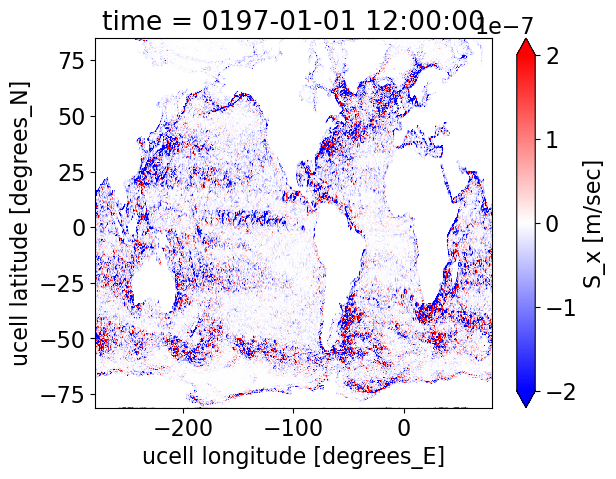

In [19]:
%matplotlib inline
low_rez['S_x'].isel(time=0).plot(cmap='bwr',vmin=-2*1e-7, vmax = 2*1e-7)
plt.show()

In [20]:
import torch
import importlib
#load the neural network
def load_model_cls(model_module_name: str, model_cls_name: str):
    try:
        module = importlib.import_module(model_module_name)
        model_cls = getattr(module, model_cls_name)
    except ModuleNotFoundError as e:
        raise type(e)('Could not retrieve the module in which the trained model \
                      is defined: ' + str(e))
    except AttributeError as e:
        raise type(e)('Could not retrieve the model\'s class. ' + str(e))
    return model_cls
def load_paper_net(device: str = 'gpu'):
    """
        Load the neural network from the paper
    """
    print('In load_paper_net()')
    model_module_name = 'models.models1'
    model_cls_name = 'FullyCNN_BC'
    model_cls = load_model_cls(model_module_name, model_cls_name)
    print('After load_model_cls()')
    net = model_cls(2, 4)
    print('After net')
    if device == 'cpu':
        transformation = torch.load('/scratch/cimes/cz3321/MOM6/MOM6-examples/src/MOM6/config_src/external/ML_Forpy/Forpy_CNN_GZ21/final_transformation.pth')
        print('After torch.load()')
    else:
        transformation = pickle_artifact(MODEL_RUN_ID, 'models/transformation')
    net.final_transformation = transformation
    print('After transformation')

    # Load parameters of pre-trained model
    print('Loading the neural net parameters')
    # logging.info('Loading the neural net parameters')
    # client = mlflow.tracking.MlflowClient()
    print('After mlflow.tracking.MlflowClient()')
#    model_file = client.download_artifacts(MODEL_RUN_ID,
#                                           'nn_weights_cpu.pth')
    model_file = '/scratch/cimes/cz3321/MOM6/MOM6-examples/src/MOM6/config_src/external/ML_Forpy/Forpy_CNN_GZ21/trained_model.pth'
    print('After download_artifacts()')
    if device == 'cpu':
        print('Device: CPU')
        model_file = '/scratch/cimes/cz3321/MOM6/MOM6-examples/src/MOM6/config_src/external/ML_Forpy/Forpy_CNN_GZ21/nn_weights_cpu.pth'
        state_dict = torch.load(model_file, map_location=torch.device('cpu'))
    else:
        state_dict = torch.load(model_file)
    #change the key name->
    print(model_cls_name)
    if model_cls_name.endswith("_BC"):
        from collections import OrderedDict
        new_name=["conv1.weight", "conv1.bias", "conv2.weight", "conv2.bias", "conv3.weight", "conv3.bias", "conv4.weight", "conv4.bias", "conv5.weight", "conv5.bias", "conv6.weight", "conv6.bias", "conv7.weight", "conv7.bias", "conv8.weight", "conv8.bias",'final_transformation.min_value']
        new_state_dict = OrderedDict()
        i=0
        for k, v in state_dict.items():
            print(k,i)
            name = new_name[i]
            new_state_dict[name] = v
            i = i+1
        state_dict = new_state_dict
        # print(state_dict.keys())
    #<-
    net.load_state_dict(state_dict)
    print(net)
    return net
matrix_dict = {}
net = load_paper_net('cpu')
net.eval()

In load_paper_net()
After load_model_cls()
After net
After torch.load()
After transformation
Loading the neural net parameters
After mlflow.tracking.MlflowClient()
After download_artifacts()
Device: CPU
FullyCNN_BC
0.weight 0
0.bias 1
2.weight 2
2.bias 3
4.weight 4
4.bias 5
6.weight 6
6.bias 7
8.weight 8
8.bias 9
10.weight 10
10.bias 11
12.weight 12
12.bias 13
14.weight 14
14.bias 15
final_transformation.min_value 16
FullyCNN_BC(
  (conv1): Conv2d(2, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv8): Conv2d(32, 4, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (final_transformation): SoftPlusTransform(Parameter contain

FullyCNN_BC(
  (conv1): Conv2d(2, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv8): Conv2d(32, 4, kernel_size=(3, 3), stride=(1, 1))
  (relu): ReLU()
  (final_transformation): SoftPlusTransform(Parameter containing:
  tensor(-0.1793, requires_grad=True))
)

In [21]:
device = torch.device('cpu')
from train.losses import HeteroskedasticGaussianLossV2

In [22]:
criterion = HeteroskedasticGaussianLossV2(n_target_channels=2)

In [23]:
from testing.utils_bc import (create_large_test_dataset, create_test_dataset)
from torch.utils.data import DataLoader

In [ ]:
from data.datasets import (RawDataFromXrDataset, DatasetTransformer,
                           Subset_, DatasetWithTransform, ComposeTransforms,
                           MultipleTimeIndices, DatasetPartitioner)
low_rez = low_rez.fillna(0)
# low_rez = low_rez.isel(time=slice(0, 3))
dataset = RawDataFromXrDataset(low_rez * 10.)
dataset.index = 'time'
dataset.add_input('usurf')
dataset.add_input('vsurf')
dataset.add_landmask_input()
dataset.add_output('S_x')
dataset.add_output('S_y')
features_transform_ = ComposeTransforms()
targets_transform_ = ComposeTransforms()
transform = DatasetTransformer(features_transform_, targets_transform_)
transform.fit(dataset)
dataset = DatasetWithTransform(dataset, transform)

In [ ]:
S_true = dataset.isel(time=-1)['usurf']
S_true.plot(cmap='bwr')
plt.show()

In [ ]:
S_true = dataset.isel(time=-1)['S_x']
S_true.plot(cmap='bwr', vmin=-2*1e-7, vmax = 2*1e-7)
plt.show()

In [ ]:
low_rez['S_x']=low_rez['S_x']*dataset.xr_dataset['landmask']
low_rez['S_y']=low_rez['S_y']*dataset.xr_dataset['landmask']

In [ ]:
if data_test==True:
  test1 = create_large_test_dataset(net.to(device=device), criterion, [dataset, ], [DataLoader(dataset)], device,mask=False, replicate=False)
  test1 = test1.rename(dict(longitude='xu_ocean', latitude='yu_ocean'))
  test2 = create_large_test_dataset(net.to(device=device), criterion, [dataset, ], [DataLoader(dataset)], device,mask=True, replicate=False)
  test2 = test2.rename(dict(longitude='xu_ocean', latitude='yu_ocean'))
  test3 = create_large_test_dataset(net.to(device=device), criterion, [dataset, ], [DataLoader(dataset)], device,mask=True, replicate=True)
  test3 = test3.rename(dict(longitude='xu_ocean', latitude='yu_ocean'))

In [ ]:
if data_test==True:
  from dask.diagnostics import ProgressBar
  with ProgressBar():
      test1 = test1.compute()
      test2 = test2.compute()
      test3 = test3.compute()
      # test3 = xr.open_dataset('test_four_regions_rpad.nc')
else:
   test1 = xr.open_dataset('test_four_regions_nobc.nc')
   test2 = xr.open_dataset('test_four_regions_0pad.nc')
   test3 = xr.open_dataset('test_four_regions_rpad.nc')

In [ ]:
def R2_snapshot(prediction, target):
  # return np.maximum(float(1 - (np.nanmean((target-prediction)**2)) / np.nanmean((target**2))),0)
  return np.maximum(1 - ((target-prediction)**2) / (target**2),0)
def MSE_snapshot(prediction, target):
  return (target-prediction)**2
def XSX_snapshot(prediction, target, velocity):
  return np.abs(velocity*target-velocity*prediction)

In [ ]:
def sx_error_plt(test,var='S_x'):
    fig, ax = plt.subplots(3, 1, figsize=(12,10))
    plt.rcParams.update({'font.size': 12})
    ax = ax.reshape(-1)
    S_test = test.isel(time=-1)['S_x']*(1e-7)
    S_true = low_rez.isel(time=-1)['S_x']
    error = S_true-S_test
    mask=dataset.isel(time=0)['landmask'].values
    maskn=np.where(mask == 0, torch.tensor(float('nan')), mask)
    R2_local = round(np.nanmean(R2_snapshot(S_test.values*maskn, S_true.values*maskn)),3)
    xq = test['xu_ocean']
    yq = test['yu_ocean']
    
    p = ax[0].pcolormesh(xq,yq, S_true, 
        cmap='bwr', vmin=-2*1e-7, vmax = 2*1e-7)
    # ax[0].set_xlabel('Longitude')
    ax[0].set_ylabel('Latitude')
    if var=='S_x':
        ax[0].set_title('(a) $S_{x}^{(mean)}$: true forcing')
    else:
        ax[0].set_title('(a) $S_{y}^{(mean)}$: true forcing')
    
    p = ax[1].pcolormesh(xq,yq,S_test, 
        cmap='bwr', vmin=-2*1e-7, vmax = 2*1e-7)
    # ax[1].set_xlabel('Longitude')
    ax[1].set_ylabel('Latitude')
    if var=='S_x':
        ax[1].set_title('(b) $S_{x}^{(mean)}$: offline prediction')
    else:
        ax[1].set_title('(b) $S_{y}^{(mean)}$: offline prediction')
    
    
    p = ax[2].pcolormesh(xq,yq,error, 
        cmap='bwr', vmin=-2*1e-7, vmax = 2*1e-7)
    ax[2].set_xlabel('Longitude')
    ax[2].set_ylabel('Latitude')
    # ax[2].set_title('(c) Error map'+f'$ R^2$(snapshot)={R2_local}')
    ax[2].set_title('(c) Error map')
    
    fig.colorbar(p, ax=ax, label='Subgrid forcing: $ms^{-2}$')
        # plt.savefig('../Paper_figures/figureB_1_1.png', dpi=300, bbox_inches="tight")
    
    # test.isel(time=-10)['S_x'].plot(vmin=-1, vmax=1, cmap='bwr')

In [ ]:
sx_error_plt(test1)

In [ ]:
sx_error_plt(test2)

In [ ]:
sx_error_plt(test3)

In [ ]:
def R2_old(test, xlim=None, ylim=None):
    mask=dataset.isel(time=0)['landmask'].values
    maskn=np.where(mask == 0, torch.tensor(float('nan')), mask)
    # mse = dict()
    # variance = dict()
    r_squared = dict()
    # correlation = dict()
    # for var in ['S_x', 'S_y']:
        # mse[var] = ((test[var] - low_rez[var]*1e7)**2).mean(dim='time')
        # variance[var] = ((low_rez[var]*1e7)**2).mean(dim='time')
        # r_squared[var] = 1 - mse[var] / variance[var]
        # correlation[var] = xr.corr(test[var], low_rez[var]*1e7, dim='time')
    from matplotlib.patches import Arrow, Circle
    fig = plt.figure(figsize=(12,5))
    plt.rcParams.update({'font.size': 16})
    # extent = (low_rez['xu_ocean'].min(), low_rez['xu_ocean'].max(), low_rez['yu_ocean'].min(), low_rez['yu_ocean'].max())
    xq = test['xu_ocean']
    yq = test['yu_ocean']
    for i, var in enumerate(['S_x', 'S_y']):
        predict = test[var]*maskn
        target = low_rez[var]*1e7*maskn
        mse = ((target - predict)**2).mean(dim='time')
        variable = (target**2).mean(dim='time')
        R2_ss = np.maximum((1 - mse / variable),-1)
        # R2_ss = (1 - mse / variable)
        plt.subplot(1, 2, i + 1)
        im = plt.pcolormesh(xq,yq,R2_ss, vmin=0., vmax=1,
                       aspect="auto")
        plt.xlim(xq[20],xq[-20])
        plt.ylim(yq[20],yq[-20])
        if xlim is not None:
            plt.xlim(xlim[0],xlim[1])
        if ylim is not None:
            plt.ylim(ylim[0],ylim[1])
        
        if i == 0:
            plt.ylabel('Latitude')
            patches = [Circle((11, 40), radius=0.4, color='white'),
                         Circle((18, 40), radius=0.4, color='green'),]
            for patch in patches:
                  im.axes.add_patch(patch)
            # values = r_squared[var].values
            # values = np.where(values < 0, 0, values)
            # R2_global = round(float(np.nanmean(values*maskn)),3)
            # R2_global = round(R2_snapshot(test[var].values*maskn, low_rez[var].values*1e7*maskn),3)
            R2_global = round(float(np.nanmean(R2_ss)),3)
            plt.title('(c) $R^2$ for $S_{x}^{(mean)}$:'+f' {R2_global}')
        elif i == 1:
            patches = [Circle((11, 40), radius=0.4, color='white'),
                         Circle((18, 40), radius=0.4, color='green'),]
            for patch in patches:
                  im.axes.add_patch(patch)
            # values = r_squared[var].values
            # values = np.where(values < 0, 0, values)
            # R2_global = round(float(np.nanmean(values*maskn)),3)
            # R2_global = round(R2_snapshot(test[var].values*maskn, low_rez[var].values*1e7*maskn),3)
            R2_global = round(float(np.nanmean(R2_ss)),3)
            plt.title('(d) $R^2$ for $S_{y}^{(mean)}$:'+f' {R2_global}')
        plt.xlabel('Longitude')

    
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.1, 0.025, 0.8])
    cbar = fig.colorbar(im, cax=cbar_ax, label=r'$R^2$')

In [ ]:
def R2(test, xlim=None, ylim=None):
    mask=dataset.isel(time=0)['landmask'].values
    maskn=np.where(mask == 0, torch.tensor(float('nan')), mask)
    mse = dict()
    variance = dict()
    r_squared = dict()
    R2_global = dict()
    # correlation = dict()
    for var in ['S_x', 'S_y']:
        mse[var] = ((test[var]*maskn - low_rez[var]*1e7*maskn)**2).mean(dim='time')
        variance[var] = ((low_rez[var]*1e7*maskn)**2).mean(dim='time')
        r_squared[var] = 1 - mse[var] / variance[var]
        R2_global[var] = 1 - np.nanmean(mse[var]) / np.nanmean(variance[var])
        # correlation[var] = xr.corr(test[var], low_rez[var]*1e7, dim='time')
    from matplotlib.patches import Arrow, Circle
    fig = plt.figure(figsize=(12,5))
    plt.rcParams.update({'font.size': 16})
    # extent = (low_rez['xu_ocean'].min(), low_rez['xu_ocean'].max(), low_rez['yu_ocean'].min(), low_rez['yu_ocean'].max())
    xq = test['xu_ocean']
    yq = test['yu_ocean']
    for i, var in enumerate(['S_x', 'S_y']):
        plt.subplot(1, 2, i + 1)
        im = plt.pcolormesh(xq,yq,r_squared[var], vmin=0., vmax=1)
        plt.xlim(xq[20],xq[-20])
        plt.ylim(yq[20],yq[-20])
        if xlim is not None:
            plt.xlim(xlim[0],xlim[1])
        if ylim is not None:
            plt.ylim(ylim[0],ylim[1])
            # R2_value=r_squared[var].isel(xu_ocean=514, yu_ocean=418).values[0]
            # print(R2_value)
            patches = [Circle((-74.15, 39.41), radius=0.4, color='red')]
            for patch in patches:
                im.axes.add_patch(patch)
        
        if i == 0:
            plt.ylabel('Latitude')
            # patches = [Circle((11, 40), radius=0.4, color='white'),
            #              Circle((18, 40), radius=0.4, color='green'),]
            # for patch in patches:
            #       im.axes.add_patch(patch)
            plt.title('(d) $R^2$ for $S_{x}^{(mean)}$:'+f' {round(R2_global[var],3)}')
        elif i == 1:
            # patches = [Circle((11, 40), radius=0.4, color='white'),
            #              Circle((18, 40), radius=0.4, color='green'),]
            # for patch in patches:
            #       im.axes.add_patch(patch)
            plt.title('(d) $R^2$ for $S_{y}^{(mean)}$:'+f' {round(R2_global[var],3)}')
        plt.xlabel('Longitude')

    
    
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.1, 0.025, 0.8])
    cbar = fig.colorbar(im, cax=cbar_ax, label=r'$R^2$')

In [ ]:
R2(test1)

In [ ]:
R2(test2)

In [ ]:
R2(test3)

In [ ]:
R2(test1,xlim=[-97,-60],ylim=[20,50])

In [ ]:
R2(test2,xlim=[-97,-60],ylim=[20,50])

In [ ]:
R2(test3,xlim=[-97,-60],ylim=[20,50])

In [ ]:
lm21x21 = xr.open_mfdataset('/scratch/cimes/cz3321/MOM6/experiments/double_gyre/postprocess/offline_test/subgrid2/landmasks/7123070201810141010.nc')

In [ ]:
lm21x21['interior'].plot()
plt.show()

In [ ]:
lm21x21['default'].plot()
plt.show()

In [ ]:
lm9x9 = xr.open_mfdataset('/scratch/cimes/cz3321/Greene/CNN_train/Arthur_model/gz21_stencil_size/gz21/landmasks/1225984245082809554.nc')
lm11x11 = xr.open_mfdataset('/scratch/cimes/cz3321/Greene/CNN_train/Arthur_model/gz21_stencil_size/gz21/landmasks/1263514675680873513.nc')
lm3x3 = xr.open_mfdataset('/scratch/cimes/cz3321/Greene/CNN_train/Arthur_model/gz21_stencil_size/gz21/landmasks/2614645880672913045.nc')
lm15x15 = xr.open_mfdataset('/scratch/cimes/cz3321/Greene/CNN_train/Arthur_model/gz21_stencil_size/gz21/landmasks/4113374454415876373.nc')
lm7x7 = xr.open_mfdataset('/scratch/cimes/cz3321/Greene/CNN_train/Arthur_model/gz21_stencil_size/gz21/landmasks/4603991310843324312.nc')
lm1x1 = xr.open_mfdataset('/scratch/cimes/cz3321/Greene/CNN_train/Arthur_model/gz21_stencil_size/gz21/landmasks/6926979472687498625.nc')
lm5x5 = xr.open_mfdataset('/scratch/cimes/cz3321/Greene/CNN_train/Arthur_model/gz21_stencil_size/gz21/landmasks/8669904822287050131.nc')

In [ ]:
lm5x5['default'].plot()
plt.show()

In [ ]:
from data.datasets import (RawDataFromXrDataset)
low_rez = low_rez.fillna(0)
# low_rez = low_rez.isel(time=slice(0, 3))
landmask = RawDataFromXrDataset(low_rez)
landmask.add_landmask_input(cnn_field_of_view=21)
landmask15 = RawDataFromXrDataset(low_rez)
landmask15.add_landmask_input(cnn_field_of_view=15)
landmask11 = RawDataFromXrDataset(low_rez)
landmask11.add_landmask_input(cnn_field_of_view=11)
landmask9 = RawDataFromXrDataset(low_rez)
landmask9.add_landmask_input(cnn_field_of_view=9)
landmask7 = RawDataFromXrDataset(low_rez)
landmask7.add_landmask_input(cnn_field_of_view=7)
landmask5 = RawDataFromXrDataset(low_rez)
landmask5.add_landmask_input(cnn_field_of_view=5)
landmask3 = RawDataFromXrDataset(low_rez)
landmask3.add_landmask_input(cnn_field_of_view=3)

In [ ]:
def RMSE_timemean_plt(test,mask):
    fig, ax = plt.subplots(2, 1, figsize=(12,10))
    S_test = test['S_x']*(1e-7)
    S_true = low_rez['S_x']

    #Open water RMSE
    maskn=np.where(mask == 0, torch.tensor(float('nan')), mask)

    xq = test['xu_ocean']
    yq = test['yu_ocean']

    RMSE_OW = np.sqrt(((S_test *maskn - S_true*maskn)**2).mean(dim='time'))
    RMSE_OW_local = float(np.nanmean(RMSE_OW))
    p = ax[0].pcolormesh(xq,yq,RMSE_OW, 
        vmin=0, vmax = 1*1e-14)
    # ax[0].set_xlabel('Longitude')
    ax[0].set_ylabel('Latitude')
    ax[0].set_title('(a) $S_{x}^{(mean)}$: true forcing')
    fig.colorbar(p, ax=ax[0], label='Subgrid forcing: $ms^{-2}$')
    
    ax[0].set_ylabel('Latitude')
    ax[0].set_title('(a) RMSE map for open water:'+f' {RMSE_OW_local:.3e}')

    ax[0].set_xlim(xq[20],xq[-20])
    ax[0].set_ylim(yq[20],yq[-20])

    #Coastal water RMSE
    maskn=np.where(mask == 1, torch.tensor(float('nan')), 1)
    # mask1=dataset.isel(time=0)['landmask'].values
    # mask1n=np.where(mask1 == 0, torch.tensor(float('nan')), mask1)
    # maskn = mask1n*maskn

    RMSE_CW = np.sqrt(((S_test *maskn - S_true*maskn)**2).mean(dim='time'))
    RMSE_CW_local = float(np.nanmean(RMSE_CW))
    p = ax[1].pcolormesh(xq,yq,RMSE_CW, 
        vmin=0, vmax = 1*1e-13)
    # ax[0].set_xlabel('Longitude')
    ax[1].set_ylabel('Latitude')
    ax[1].set_title('(b) $S_{x}^{(mean)}$: true forcing')
    fig.colorbar(p, ax=ax[1], label='Subgrid forcing: $ms^{-2}$')
    
    ax[1].set_ylabel('Latitude')
    ax[1].set_title('(b) RMSE map for coastal water:'+f' {RMSE_CW_local:.3e}')

    ax[1].set_xlim(xq[20],xq[-20])
    ax[1].set_ylim(yq[20],yq[-20])

In [ ]:
def RMSE_timemean_log_plt(test,mask):
    fig, ax = plt.subplots(2, 1, figsize=(12,10))
    mask1=dataset.isel(time=0)['landmask'].values
    S_test = test['S_x']*(1e-7)*dataset.isel(time=0)['landmask']
    S_true = low_rez['S_x']*dataset.isel(time=0)['landmask']

    #Open water RMSE
    maskn=np.where(mask == 0, torch.tensor(float('nan')), mask)

    xq = test['xu_ocean']
    yq = test['yu_ocean']

    # MSE_OW = MSE_snapshot(S_test.mean(dim='time').values*maskn, S_true.mean(dim='time').values*maskn)
    RMSE_OW = np.sqrt(((S_test *maskn - S_true*maskn)**2).mean(dim='time'))
    RMSE_OW = np.where(RMSE_OW == 0, 1e-30, RMSE_OW)
    RMSE_OW_local = float(np.nanmean(RMSE_OW))
    p = ax[0].pcolormesh(xq,yq,np.log10(RMSE_OW), 
        vmin=-8, vmax = -6)
    
    # create Colormap
    colors = [ "gray","none"] 
    cmap = mcolors.ListedColormap(colors)
    bounds = [0, 0.5, 1]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    
    # use pcolormesh for landmask
    landmask_plot = ax[0].pcolormesh(xq, yq, mask1, cmap=cmap, norm=norm, shading='auto')

    # ax[0].set_xlabel('Longitude')
    ax[0].set_ylabel('Latitude')
    ax[0].set_title('(a) $S_{x}^{(mean)}$: true forcing')
    cbar = fig.colorbar(p, ax=ax[0],ticks=[-8, -7, -6], label='Subgrid forcing: $ms^{-2}$')
    cbar.ax.set_yticklabels(['$10^{-8}$', '$10^{-7}$', '$10^{-6}$'])

    ax[0].set_aspect('equal')
    ax[0].set_ylabel('Latitude')
    ax[0].set_title('(a) RMSE map for open water:'+f' {RMSE_OW_local:.3e}')

    ax[0].set_xlim(xq[20],xq[-20])
    ax[0].set_ylim(yq[20],yq[-20])

    #Coastal water RMSE
    maskn=np.where(mask == 1, torch.tensor(float('nan')), 1)
    mask1n=np.where(mask1 == 0, torch.tensor(float('nan')), mask1)
    maskn = mask1n*maskn

    # MSE_CW = MSE_snapshot(S_test.mean(dim='time').values*maskn, S_true.mean(dim='time').values*maskn)
    RMSE_CW = np.sqrt(((S_test *maskn - S_true*maskn)**2).mean(dim='time'))
    RMSE_CW = np.where(RMSE_CW == 0, 1e-30, RMSE_CW)
    RMSE_CW_local = float(np.nanmean(RMSE_CW))
    p = ax[1].pcolormesh(xq,yq,np.log10(RMSE_CW),  
        vmin=-8, vmax = -6)
    
    # create Colormap
    colors = [ "gray","none"] 
    cmap = mcolors.ListedColormap(colors)
    bounds = [0, 0.5, 1]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    
    # use pcolormesh for landmask
    landmask_plot = ax[1].pcolormesh(xq, yq, mask1, cmap=cmap, norm=norm, shading='auto')

    ax[1].set_aspect('equal')
    ax[1].set_xlabel('Longitude')
    ax[1].set_ylabel('Latitude')
    ax[1].set_title('(b) $S_{x}^{(mean)}$: true forcing')
    cbar = fig.colorbar(p, ax=ax[1],ticks=[-8, -7, -6], label='Subgrid forcing: $ms^{-2}$')
    cbar.ax.set_yticklabels(['$10^{-8}$', '$10^{-7}$', '$10^{-6}$'])
    
    ax[1].set_ylabel('Latitude')
    ax[1].set_title('(b) RMSE map for coastal water:'+f' {RMSE_CW_local:.3e}')

    ax[1].set_xlim(xq[20],xq[-20])
    ax[1].set_ylim(yq[20],yq[-20])

In [ ]:
RMSE_timemean_log_plt(test1,mask=landmask.isel(time=0)['landmask'].values)

In [ ]:
RMSE_timemean_log_plt(test2,mask=landmask.isel(time=0)['landmask'].values)

In [ ]:
RMSE_timemean_log_plt(test3,mask=landmask.isel(time=0)['landmask'].values)

In [ ]:
from matplotlib import patches 
def MSE_timemean_diff_plt(test1,test2,mask, xlim=None, ylim=None,cbox1=None,cbox2=None):
    fig, ax = plt.subplots(2, 1, figsize=(12,10))
    S_test1 = test1['S_x']*(1e-7)*dataset.isel(time=0)['landmask']
    S_test2 = test2['S_x']*(1e-7)*dataset.isel(time=0)['landmask']
    S_true = low_rez['S_x']*dataset.isel(time=0)['landmask']

    #Open water MSE
    maskn=np.where(mask == 0, torch.tensor(float('nan')), mask)

    xq = test1['xu_ocean']
    yq = test1['yu_ocean']

    #Coastal water MSE
    maskn=np.where(mask == 1, torch.tensor(float('nan')), 1)
    # mask1=dataset.isel(time=0)['landmask'].values
    # mask1n=np.where(mask1 == 0, torch.tensor(float('nan')), mask1)
    # maskn = mask1n*maskn

    MSE_CW1 = ((S_test1 *maskn - S_true*maskn)**2).mean(dim='time')
    MSE_CW1 = np.where(MSE_CW1 == 0, 1e-30, MSE_CW1)
    MSE_CW1_local = float(np.nanmean(MSE_CW1))
    p = ax[0].pcolormesh(xq,yq,np.log10(MSE_CW1),
        vmin=-16, vmax = -12)
    # ax[0].set_xlabel('Longitude')
    ax[0].set_ylabel('Latitude')
    ax[0].set_title('(c) $S_{x}^{(mean)}$: true forcing')
    cbar = fig.colorbar(p, ax=ax[0],ticks=[-16, -15, -14, -13, -12], label='Subgrid forcing: $ms^{-2}$')
    cbar.ax.set_yticklabels(['$10^{-16}$', '$10^{-15}$', '$10^{-14}$','$10^{-13}$','$10^{-12}$'])
    
    ax[0].set_ylabel('Latitude')
    ax[0].set_title('(c) MSE map (0P) for coastal water:'+f' {MSE_CW1_local:.3e}')

    if xlim is None:
        ax[0].set_xlim(xq[20],xq[-20])
        ax[0].set_ylim(yq[20],yq[-20])
    else:
        ax[0].set_xlim(xlim[0],xlim[1])
        ax[0].set_ylim(ylim[0],ylim[1])


    MSE_CW2 = ((S_test2 *maskn - S_true*maskn)**2).mean(dim='time')
    MSE_CW2 = np.where(MSE_CW2 == 0, 1e-30, MSE_CW2)
    MSE_CW2_local = float(np.nanmean(MSE_CW2))
    p = ax[1].pcolormesh(xq,yq,np.log10(MSE_CW2), 
        vmin=-16, vmax = -12)
    ax[1].set_xlabel('Longitude')
    ax[1].set_ylabel('Latitude')
    ax[1].set_title('(d) $S_{x}^{(mean)}$: true forcing')
    cbar = fig.colorbar(p, ax=ax[1],ticks=[-16, -15, -14, -13, -12], label='Subgrid forcing: $ms^{-2}$')
    cbar.ax.set_yticklabels(['$10^{-16}$', '$10^{-15}$', '$10^{-14}$','$10^{-13}$','$10^{-12}$'])
    
    ax[1].set_ylabel('Latitude')
    ax[1].set_title('(d) MSE map (RP) for coastal water:'+f' {MSE_CW2_local:.3e}')

    if xlim is None:
        ax[1].set_xlim(xq[20],xq[-20])
        ax[1].set_ylim(yq[20],yq[-20])
    else:
        ax[1].set_xlim(xlim[0],xlim[1])
        ax[1].set_ylim(ylim[0],ylim[1])
    

    # MSE_CW_diff = MSE_CW1-MSE_CW2
    # p = ax[2].pcolormesh(xq,yq,MSE_CW_diff, 
    #     vmin=-5*1e-14, vmax = 5*1e-14)
    # if cbox1 is not None:
    #     ax[2].add_patch(patches.Rectangle([cbox1[0],cbox1[2]],cbox1[1]-cbox1[0],cbox1[3]-cbox1[2], color="grey",fill=None,linewidth=2))
    # if cbox2 is not None:
    #     ax[2].add_patch(patches.Rectangle([cbox2[0],cbox2[2]],cbox2[1]-cbox2[0],cbox2[3]-cbox2[2], color="grey",fill=None,linewidth=2))
    
    # ax[2].set_xlabel('Longitude')
    # ax[2].set_ylabel('Latitude')
    # ax[2].set_title('(e) $S_{x}^{(mean)}$: true forcing')
    # fig.colorbar(p, ax=ax[2], label='Subgrid forcing: $ms^{-2}$')
    
    # ax[2].set_ylabel('Latitude')
    # ax[2].set_title('(e) MSE difference between (c) and (d)')
    # # ax[2].set_title('Oceania')
    # # ax[2].set_title('Caribbean')

    # if xlim is None:
    #     ax[2].set_xlim(xq[20],xq[-20])
    #     ax[2].set_ylim(yq[20],yq[-20])
    # else:
    #     ax[2].set_xlim(xlim[0],xlim[1])
    #     ax[2].set_ylim(ylim[0],ylim[1])

In [ ]:
MSE_timemean_diff_plt(test2,test3,mask=landmask.isel(time=0)['landmask'].values,cbox1=[-254,-180,-25,25],cbox2=[-97,-60,0,25])

In [ ]:
from matplotlib import patches 
def RMSE_timemean_diff_zoomin_plt(test1,test2,test3,mask, xlim=None, ylim=None,cbox1=None,cbox2=None):
    fig, ax = plt.subplots(1, 3, figsize=(24,8))
    S_test1 = test1['S_x']*(1e-7)*dataset.isel(time=0)['landmask']
    S_test2 = test2['S_x']*(1e-7)*dataset.isel(time=0)['landmask']
    S_test3 = test3['S_x']*(1e-7)*dataset.isel(time=0)['landmask']
    S_true = low_rez['S_x']*dataset.isel(time=0)['landmask']

    #Open water MSE
    maskn=np.where(mask == 0, torch.tensor(float('nan')), mask)

    xq = test1['xu_ocean']
    yq = test1['yu_ocean']

    #Coastal water MSE
    maskn=np.where(mask == 1, torch.tensor(float('nan')), 1)
    mask1=dataset.isel(time=0)['landmask'].values
    mask1n=np.where(mask1 == 0, torch.tensor(float('nan')), mask1)
    maskn = mask1n*maskn

    RMSE_CW1 = np.sqrt(((S_test1 *maskn - S_true*maskn)**2).mean(dim='time'))
    RMSE_CW1 = np.where(RMSE_CW1 == 0, 1e-30, RMSE_CW1)
    RMSE_CW1_local = float(np.nanmean(RMSE_CW1))
    p = ax[0].pcolormesh(xq,yq,np.log10(RMSE_CW1),  
        vmin=-8, vmax = -6)
    
    # create Colormap
    colors = [ "gray","none"] 
    cmap = mcolors.ListedColormap(colors)
    bounds = [0, 0.5, 1]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    
    # use pcolormesh for landmask
    ax[0].pcolormesh(xq, yq, mask1, cmap=cmap, norm=norm, shading='auto')

    ax[0].set_xlabel('Longitude')
    ax[0].set_ylabel('Latitude')
    # cbar = fig.colorbar(p, ax=ax[0],ticks=[-16, -15, -14, -13, -12], label='Subgrid forcing: $ms^{-2}$')
    # cbar.ax.set_yticklabels(['$10^{-16}$', '$10^{-15}$', '$10^{-14}$','$10^{-13}$','$10^{-12}$'])
    
    ax[0].set_title('(e) No BC')

    if xlim is None:
        ax[0].set_xlim(xq[20],xq[-20])
        ax[0].set_ylim(yq[20],yq[-20])
    else:
        ax[0].set_xlim(xlim[0],xlim[1])
        ax[0].set_ylim(ylim[0],ylim[1])


    RMSE_CW2 = np.sqrt(((S_test2 *maskn - S_true*maskn)**2).mean(dim='time'))
    RMSE_CW2 = np.where(RMSE_CW2 == 0, 1e-30, RMSE_CW2)
    RMSE_CW2_local = float(np.nanmean(RMSE_CW2))
    p = ax[1].pcolormesh(xq,yq,np.log10(RMSE_CW2),  
        vmin=-8, vmax = -6)
    ax[1].pcolormesh(xq, yq, mask1, cmap=cmap, norm=norm, shading='auto')
    ax[1].set_xlabel('Longitude')
    # ax[1].set_ylabel('Latitude')
    # cbar = fig.colorbar(p, ax=ax[1],ticks=[-16, -15, -14, -13, -12], label='Subgrid forcing: $ms^{-2}$')
    # cbar.ax.set_yticklabels(['$10^{-16}$', '$10^{-15}$', '$10^{-14}$','$10^{-13}$','$10^{-12}$'])
    
    ax[1].set_title('(f) Zero padding')

    if xlim is None:
        ax[1].set_xlim(xq[20],xq[-20])
        ax[1].set_ylim(yq[20],yq[-20])
    else:
        ax[1].set_xlim(xlim[0],xlim[1])
        ax[1].set_ylim(ylim[0],ylim[1])
    

    RMSE_CW3 = np.sqrt(((S_test3 *maskn - S_true*maskn)**2).mean(dim='time'))
    RMSE_CW3 = np.where(RMSE_CW3 == 0, 1e-30, RMSE_CW3)
    RMSE_CW3_local = float(np.nanmean(RMSE_CW3))
    p = ax[2].pcolormesh(xq,yq,np.log10(RMSE_CW3),  
        vmin=-8, vmax = -6)
    ax[2].pcolormesh(xq, yq, mask1, cmap=cmap, norm=norm, shading='auto')
    ax[2].set_xlabel('Longitude')
    # ax[2].set_ylabel('Latitude')
    # cbar = fig.colorbar(p, ticks=[-16, -15, -14, -13, -12], label='Subgrid forcing: $ms^{-2}$')
    # cbar.ax.set_yticklabels(['$10^{-16}$', '$10^{-15}$', '$10^{-14}$','$10^{-13}$','$10^{-12}$'])
    
    ax[2].set_title('(g) Replicate padding')

    if xlim is None:
        ax[2].set_xlim(xq[20],xq[-20])
        ax[2].set_ylim(yq[20],yq[-20])
    else:
        ax[2].set_xlim(xlim[0],xlim[1])
        ax[2].set_ylim(ylim[0],ylim[1])

    from matplotlib.patches import Arrow, Circle
    patches = [Circle((-74.15, 39.41), radius=0.4, color='red')]
    for patch in patches:
        ax[2].axes.add_patch(patch)

    plt.subplots_adjust(bottom=0.2)
    cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.05]) 
    cbar = fig.colorbar(p, cax=cbar_ax, orientation='horizontal',ticks=[-8, -7, -6], label='Subgrid forcing: $ms^{-2}$')
    cbar.ax.set_xticklabels(['$10^{-8}$', '$10^{-7}$', '$10^{-6}$'])

In [ ]:
RMSE_timemean_diff_zoomin_plt(test1,test2,test3,mask=landmask.isel(time=0)['landmask'].values,xlim=[-97,-60],ylim=[20,50])

In [ ]:
def RMSE_timemean_calc(test,mask,cal_max=False):
    mask1=dataset.isel(time=0)['landmask'].values
    S_test = test['S_x']*(1e-7)*mask1
    S_true = low_rez['S_x']*mask1

    xq = test['xu_ocean']
    yq = test['yu_ocean']

    #Coastal water RMSE
    maskn=np.where(mask == 1, torch.tensor(float('nan')), 1)
    mask1n=np.where(mask1 == 0, torch.tensor(float('nan')), mask1)
    maskn = mask1n*maskn

    # MSE_CW = MSE_snapshot(S_test.mean(dim='time').values*maskn, S_true.mean(dim='time').values*maskn)
    RMSE_CW = np.sqrt(((S_test *maskn - S_true*maskn)**2).mean(dim='time'))
    RMSE_CW = np.where(RMSE_CW == 0, 1e-30, RMSE_CW)
    RMSE_CW_local = float(np.nanmean(RMSE_CW))

    if cal_max:
      MAX_CW_local = float(np.nanmax(np.abs(S_test *maskn)))
      print('max value of forceing in coastal water:'+f' {MAX_CW_local:.3e}')

    print('RMSE map for coastal water:'+f' {RMSE_CW_local:.3e}')

In [ ]:
RMSE_timemean_calc(test1,mask=landmask15.isel(time=0)['landmask'].values,cal_max=True)
RMSE_timemean_calc(test2,mask=landmask15.isel(time=0)['landmask'].values)
RMSE_timemean_calc(test3,mask=landmask15.isel(time=0)['landmask'].values)

In [ ]:
RMSE_timemean_calc(test1,mask=landmask11.isel(time=0)['landmask'].values,cal_max=True)
RMSE_timemean_calc(test2,mask=landmask11.isel(time=0)['landmask'].values)
RMSE_timemean_calc(test3,mask=landmask11.isel(time=0)['landmask'].values)

In [ ]:
RMSE_timemean_calc(test1,mask=landmask9.isel(time=0)['landmask'].values,cal_max=True)
RMSE_timemean_calc(test2,mask=landmask9.isel(time=0)['landmask'].values)
RMSE_timemean_calc(test3,mask=landmask9.isel(time=0)['landmask'].values)

In [ ]:
RMSE_timemean_calc(test1,mask=landmask7.isel(time=0)['landmask'].values,cal_max=True)
RMSE_timemean_calc(test2,mask=landmask7.isel(time=0)['landmask'].values)
RMSE_timemean_calc(test3,mask=landmask7.isel(time=0)['landmask'].values)

In [ ]:
RMSE_timemean_calc(test1,mask=landmask5.isel(time=0)['landmask'].values,cal_max=True)
RMSE_timemean_calc(test2,mask=landmask5.isel(time=0)['landmask'].values)
RMSE_timemean_calc(test3,mask=landmask5.isel(time=0)['landmask'].values)

In [ ]:
RMSE_timemean_calc(test1,mask=landmask3.isel(time=0)['landmask'].values,cal_max=True)
RMSE_timemean_calc(test2,mask=landmask3.isel(time=0)['landmask'].values)
RMSE_timemean_calc(test3,mask=landmask3.isel(time=0)['landmask'].values)

In [ ]:
def TS_at_location(test,lon=-80,lat=25):
    x = np.abs(low_rez.xu_ocean - lon).argmin().item()
    y = np.abs(low_rez.yu_ocean - lat).argmin().item()
    s = (100, 400) 
    print(x, ' ', y)
    print(low_rez.xu_ocean[x].values,low_rez.yu_ocean[y].values)
    fig = plt.figure(figsize=(12,4))
    plt.rcParams.update({'font.size': 16})
    var = 'S_x'
    
    # ax = plt.subplot(2, 1, 1)
    plt.plot(low_rez[var].isel(xu_ocean=x, yu_ocean=y,time=slice(s[0],s[1]))*1e7, linewidth=3)
    plt.plot(test[var].isel(xu_ocean=x, yu_ocean=y,time=slice(s[0],s[1])))
    ub = (test[var].isel(xu_ocean=x, yu_ocean=y,time=slice(s[0],s[1]))
          + 1.96 / test[f'{var}scale'].isel(xu_ocean=x, yu_ocean=y,time=slice(s[0],s[1])))
    lb = (test[var].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1]))
          - 1.96 / test[f'{var}scale'].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1])))
    plt.plot(ub, '--g')
    plt.plot(lb, '--g')
#     ax.set_title('(e) at $(11^{\circ},40^{\circ})$, white dot')
      #   ax.set_xticks([])
      #   ax.set_title('(e) '+LAYER+' at $(11^{\circ},40^{\circ})$, white dot')
    plt.xlabel('time (years)')
    plt.ylabel(fr'${var}$' + '  ' +  r'$(1e^{-7}ms^{-2}$)')

In [ ]:
TS_at_location(test1,lon=-74.15,lat=39.41)

In [ ]:
TS_at_location(test2,lon=-74.15,lat=39.41)

In [ ]:
TS_at_location(test3,lon=-74.15,lat=39.41)

In [ ]:
test1_0 = xr.open_dataset('test_four_regions_nobc.nc')
test2_0 = xr.open_dataset('test_four_regions_0pad.nc')
test3_0 = xr.open_dataset('test_four_regions_rpad.nc')
test1 = xr.open_dataset('test_four_regions_test2_nobc.nc')
test2 = xr.open_dataset('test_four_regions_test2_0pad.nc')
test3 = xr.open_dataset('test_four_regions_test2_rpad.nc')

In [ ]:
from matplotlib import patches 
def RMSD_timemean_diff_plt(test1_0,test2_0,test3_0,test1,test2,test3,mask, xlim=None, ylim=None,cbox1=None,cbox2=None):
    fig, ax = plt.subplots(3, 1, figsize=(12,15))
    plt.rcParams.update({'font.size': 14})
    mask1=dataset.isel(time=0)['landmask'].values
    S_test1 = test1['S_x']*(1e-7)*mask1
    S_test2 = test2['S_x']*(1e-7)*mask1
    S_test3 = test3['S_x']*(1e-7)*mask1
    S_test1_0 = test1_0['S_x']*(1e-7)*mask1
    S_test2_0 = test2_0['S_x']*(1e-7)*mask1
    S_test3_0 = test3_0['S_x']*(1e-7)*mask1
    # S_true = low_rez['S_x']

    xq = test1['xu_ocean']
    yq = test1['yu_ocean']

    # create Colormap
    colors = [ "gray","none"] 
    cmap = mcolors.ListedColormap(colors)
    bounds = [0, 0.5, 1]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)


    #Coastal water MSE
    maskn=np.where(mask == 1, torch.tensor(float('nan')), 1)
    mask1n=np.where(mask1 == 0, torch.tensor(float('nan')), mask1)
    maskn = mask1n*maskn

    MSE_CW1 = np.sqrt(((S_test1 *maskn - S_test1_0*maskn)**2).mean(dim='time'))
    MSE_CW1 = np.where(MSE_CW1 == 0, 1e-30, MSE_CW1)
    MSE_CW1_local = float(np.nanmean(MSE_CW1))
    p = ax[0].pcolormesh(xq,yq,np.log10(MSE_CW1), 
        vmin=-8, vmax = -6)
    # use pcolormesh for landmask
    ax[0].pcolormesh(xq, yq, mask1, cmap=cmap, norm=norm, shading='auto')

    # ax[0].set_xlabel('Longitude')
    ax[0].set_ylabel('Latitude')
    cbar = fig.colorbar(p, ax=ax[0],ticks=[-8, -7, -6], label='Subgrid forcing: $ms^{-2}$')
    cbar.ax.set_yticklabels(['$10^{-8}$', '$10^{-7}$', '$10^{-6}$'])
    
    ax[0].set_title('(a) RMSD map (no BC) for coastal water:'+f' {MSE_CW1_local:.3e}')
    ax[0].set_aspect('equal')

    if xlim is None:
        ax[0].set_xlim(xq[20],xq[-20])
        ax[0].set_ylim(yq[20],yq[-20])
    else:
        ax[0].set_xlim(xlim[0],xlim[1])
        ax[0].set_ylim(ylim[0],ylim[1])


    MSE_CW2 = np.sqrt(((S_test2 *maskn - S_test2_0*maskn)**2).mean(dim='time'))
    MSE_CW2 = np.where(MSE_CW2 == 0, 1e-30, MSE_CW2)
    MSE_CW2_local = float(np.nanmean(MSE_CW2))
    p = ax[1].pcolormesh(xq,yq,np.log10(MSE_CW2), 
        vmin=-8, vmax = -6)
    
    # use pcolormesh for landmask
    ax[1].pcolormesh(xq, yq, mask1, cmap=cmap, norm=norm, shading='auto')

    # ax[1].set_xlabel('Longitude')
    ax[1].set_ylabel('Latitude')
    cbar = fig.colorbar(p, ax=ax[1],ticks=[-8, -7, -6], label='Subgrid forcing: $ms^{-2}$')
    cbar.ax.set_yticklabels(['$10^{-8}$', '$10^{-7}$', '$10^{-6}$'])
    
    ax[1].set_title('(b) RMSD map (0P) for coastal water:'+f' {MSE_CW2_local:.3e}')
    ax[1].set_aspect('equal')

    if xlim is None:
        ax[1].set_xlim(xq[20],xq[-20])
        ax[1].set_ylim(yq[20],yq[-20])
    else:
        ax[1].set_xlim(xlim[0],xlim[1])
        ax[1].set_ylim(ylim[0],ylim[1])
    

    MSE_CW3 = np.sqrt(((S_test3 *maskn - S_test3_0*maskn)**2).mean(dim='time'))
    MSE_CW3 = np.where(MSE_CW3 == 0, 1e-30, MSE_CW3)
    MSE_CW3_local = float(np.nanmean(MSE_CW3))
    p = ax[2].pcolormesh(xq,yq,np.log10(MSE_CW3), 
        vmin=-8, vmax = -6)
    # use pcolormesh for landmask
    ax[2].pcolormesh(xq, yq, mask1, cmap=cmap, norm=norm, shading='auto')
    ax[2].set_xlabel('Longitude')
    ax[2].set_ylabel('Latitude')
    cbar = fig.colorbar(p, ax=ax[2],ticks=[-8, -7, -6], label='Subgrid forcing: $ms^{-2}$')
    cbar.ax.set_yticklabels(['$10^{-8}$', '$10^{-7}$', '$10^{-6}$'])
    
    ax[2].set_title('(b) RMSD map (RP) for coastal water:'+f' {MSE_CW3_local:.3e}')
    ax[2].set_aspect('equal')

    if xlim is None:
        ax[2].set_xlim(xq[20],xq[-20])
        ax[2].set_ylim(yq[20],yq[-20])
    else:
        ax[2].set_xlim(xlim[0],xlim[1])
        ax[2].set_ylim(ylim[0],ylim[1])

In [ ]:
RMSD_timemean_diff_plt(test1_0,test2_0,test3_0,test1,test2,test3,mask=landmask.isel(time=0)['landmask'].values)